## Part 3: Machine Learning Model

As we have explored, there are many applications of a song's features that contribute to its popularity. Because of this, it is feasible to create a machine learning model that can accurately predict a song's popularity, simply based on its objective and holistic features. Given a song's danceability, genre, tempo, etc, a model could predict how well a song would chart.

In order to generate this model, I decided to use scikit-learn's Decision Tree models in order to do so. I felt that a decision tree could best represent the process necessary in order to develop recommendations, as it examines and weights the factors that I analyzed in the previous parts.

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/Users/jarek/Spotify project/SpotifyAnalysis.csv')
df = df.drop(df.columns[0:5], axis = 1)
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Firstly, I import the necessary libraries to create my model, as well as establish my dataset and remove an unnecessary column from it. I also needed to remove the track name, track id, album name and artist names from the data, as these are identifier variables that would take much too long to parse through. I still have a remaining categorical variable, genre, that I need to remove in order to process my model.

In [37]:
features = pd.get_dummies(df.loc[:, df.columns != 'popularity'])
labels = df['popularity']

In order to remove the categorical data, we can utilize the pandas function get_dummies, which one-hot encodes categorical variables. This is the process of creating columns for the different entries of the categorical data, and placing a 0 or 1 corresponding to the variable belonging to the entity. The label I wish to use for my model is the numeric value popularity, with the features being all other columns.

In [38]:
features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size=0.2)

In order to properly ensure that my model is tested properly, I need to segment my data between a training set and a testing set. This is done using the code above, which shows that 80% of the data will be split into a set of training features and labels, and then will be tested onto the other set of features and labels.

In [40]:
model = DecisionTreeRegressor()
model.fit(features_train, labels_train)

train_predictions = model.predict(features_train)
print('Train MSE:', mean_squared_error(labels_train, train_predictions))

test_predictions = model.predict(features_test)
print('Test MSE:', mean_squared_error(labels_test, test_predictions))

Train MSE: 15.658907756456552
Test MSE: 466.52855610398643


The algorithm I decided to utilize a Decision Tree, specifically a regressor in order to predict values. How it works is that it evaluates each occurence of data, splitting it up into parts in order to define its set features, with a prediction for the label value coming at the end.After creating the model, in order to test the accuracy of it I utilize MSE, or mean squared error. Mean squared error, in the context of a regression, is the summation of the residuals squared divided by the number of datapoints in the population. The reasoning for squaring the errors is found in the fact that residuals can be either higher or lower. After evaluating the training model, there was an MSE of 15.6589, which is relatively good. However, the testing MSE was 466.5286. This is substantially high, suggesting a large skew error found within the model. It is likely that the errors show from the variance in how the popularity score is judged, as going off of only the song features alone could not give a good enough identifier. I felt that by forcing the model to predict an exact number, despite only asking for a number between 1 and 100, demanded too much out of the dataset. In order to account for this, I decided to revise my approach.

## Revision

In [41]:
df['popularity_indicator'] = 'Not Popular'
df.loc[df['popularity'] > 70, 'popularity_indicator'] = 'Popular'
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_indicator
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Popular
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Not Popular
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Not Popular
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Popular
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Not Popular
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Not Popular
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Not Popular
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Not Popular


My solution to the problem above was to create a Popular/Not Popular identifier, and see if a model could classify between the two. By broadening the criterion for the options, the model would have a lot larger opportunity for predictions and could more easily suggest identify the factors contributing to a song's popularity. I also needed to drop the popularity column from the dataset, which I do below.

In [42]:
df = df.drop(df.columns[0], axis=1)
df.groupby('popularity_indicator').count()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
popularity_indicator,,,,,,,,,,,,,,,
Not Popular,109154,109154,109154,109154,109154,109154,109154,109154,109154,109154,109154,109154,109154,109154,109154
Popular,4846,4846,4846,4846,4846,4846,4846,4846,4846,4846,4846,4846,4846,4846,4846


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

new_features = pd.get_dummies(df.loc[:, df.columns != 'popularity_indicator'])
new_labels = df['popularity_indicator']

nfeatures_train, nfeatures_test, nlabels_train, nlabels_test = \
        train_test_split(new_features, new_labels, test_size=0.2)

new_model = DecisionTreeClassifier()

new_model.fit(nfeatures_train, nlabels_train)
ntrain_predictions = new_model.predict(nfeatures_train)
print('New Train Accuracy:', accuracy_score(nlabels_train, ntrain_predictions))

ntest_predictions = new_model.predict(nfeatures_test)
print('New Test Accuracy:', accuracy_score(nlabels_test, ntest_predictions))

New Train Accuracy: 0.9967214912280702
New Test Accuracy: 0.9319736842105263


Because I swapped the nature of my label variable, I had to switch the type of model utilized, going from a regressor to a classifier. A classifier works in the same way, except it has to decide between two values rather than a multitude of them when predicting. As predicted, this greatly aided my results, with a 0.9967 accuracy score for my training model. At first, I felt wary of the fact that the training accuracy was so high, with a fear that the model was overfit to this dataset. However, due to the sheer breadth of the set, it prevailed in the testing phase, returning accuracy scores around .9320. This result was a lot more favorable, and helps in Spotify's mission to deliver quality recommendations to users by allowing them to find popular music through its features alone.

[Text(0, 0.5, 'Not Popular'), Text(0, 1.5, 'Popular')]

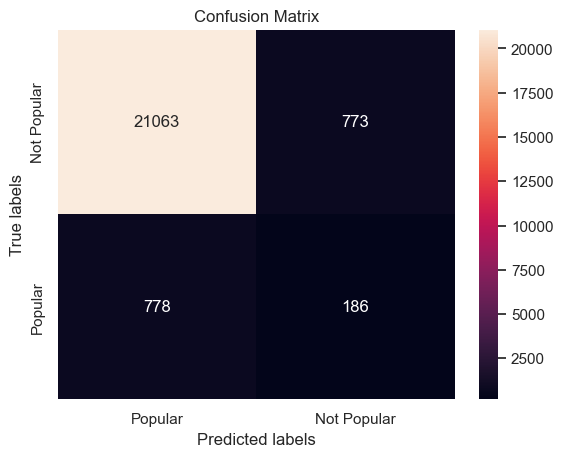

In [50]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

con_mat = confusion_matrix(y_true=nlabels_test, y_pred=ntest_predictions)
ax = plt.subplot()
sns.heatmap(con_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Not Popular', 'Popular'])
ax.yaxis.set_ticklabels(['Not Popular', 'Popular'])

To aid in my analysis of my model, I also created a confusion matrix, essentially graphing the values of true negatives, true positives, false negatives and false positives. What brings grief is that the model still isn't especially effective in terms of predicting popular songs, only correctly labeling ~ 15% of them. However, the model does show promise in terms of accurately identifying what song features are found in less popular music, which I asserted in my previous analyses would likely be lower danceability or energy above most factors. Thus, I consider my model a success in terms of my goals for this project, as it supports the notion that the ticket to popularity is found in the energy and danceability of your song. At the end of the day, popularity is such a subjective term, dominated by externalities that cannot be fully encompassed in data. Trends, celebrity contributions, current events and more all play a factor in deciding mainstreams tastes. However, we can rest assured that there are still common factors in popular music that allow it to stand out above the rest.